# Big Data Applications Project - EFREI 2021

### By Raphaël Tran & Yoann Torrado 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_train = pd.read_csv("../data/raw/application_train.csv")
df_test = pd.read_csv("../data/raw/application_test.csv")

In [2]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


#### We determine the ratio between 0 and 1 target

<AxesSubplot:ylabel='Frequency'>

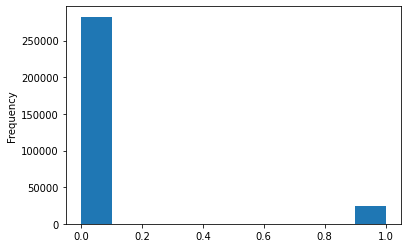

In [4]:
df_train['TARGET'].astype(int).plot.hist()

The ratio between 0 labels and 1 labels is dispropotionalte and imbalanced : we need to take that into account in the future.

#### We need to find percentage of missing values 

In [5]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
# Missing values statistics
missing_values = missing_values_table(df_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


There are a good amount of missing values in the table : we will need to replace them later.

In [7]:
# Number of unique classes in each object column
df_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

#### One-hot encoding 

In [8]:
df_train_encoded = pd.get_dummies(df_train)
df_test_encoded = pd.get_dummies(df_test)

print("Training set shape :", df_train_encoded.shape)
print("Testing set shape :", df_test_encoded.shape)

Training set shape : (307511, 246)
Testing set shape : (48744, 242)


Since training and testing data don't have the same number of features we will need to align them

In [9]:
train_labels = df_train_encoded['TARGET']

df_train_encoded, df_test_encoded = df_train_encoded.align(df_test_encoded, join = 'inner', axis = 1)

# Add the target back in
df_train_encoded['TARGET'] = train_labels

print('Training Features shape: ', df_train_encoded.shape)
print('Testing Features shape: ', df_test_encoded.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 242)


#### Checking anomalies in continous data columns

In [10]:
df_train = df_train_encoded
df_test = df_test_encoded

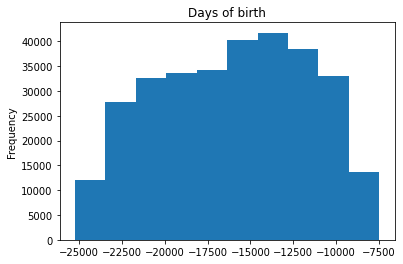

In [11]:
df_train['DAYS_BIRTH'].plot.hist(title = 'Days of birth');

We encounter negative values, but that is because the date is relative to the date of the loan. We can get the age of the loaner by multiplying by -1 and divide by 365 to obtain the age in years

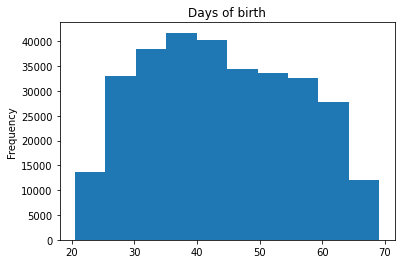

In [12]:
(df_train['DAYS_BIRTH'] / -365 ).plot.hist(title = 'Days of birth');

Age is bounded between 20 and 70 years : no anomalies here 

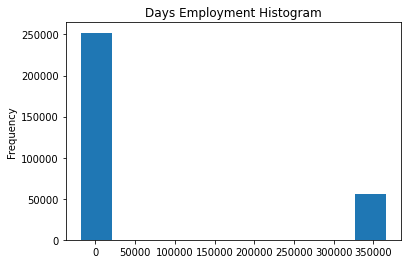

In [13]:
df_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');

Here we see rows that have days of employment > 1000 years. We need to replace this anormal value 

In [14]:
anomaly = df_train['DAYS_EMPLOYED'] > 300000
df_train[anomaly].DAYS_EMPLOYED

8         365243
11        365243
23        365243
38        365243
43        365243
           ...  
307469    365243
307483    365243
307487    365243
307505    365243
307507    365243
Name: DAYS_EMPLOYED, Length: 55374, dtype: int64

All anormal rows share the same value of **365243** so we can replace all values of this column by *Nan* .We also add a boolean culumn flag to tell if the missin value was an anomaly or not

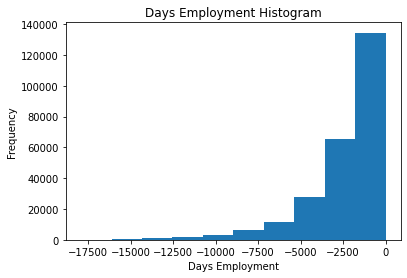

In [15]:
# Create an anomalous flag column
df_train['DAYS_EMPLOYED_ANOM'] = df_train["DAYS_EMPLOYED"] == 365243
df_test['DAYS_EMPLOYED_ANOM'] = df_test["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
df_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
df_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

df_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

#### Correlation matrix

In [17]:
# Find correlations with the target and sort
correlations = df_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

Notable features are :

 - Positive correlations
     - TARGET : obviously the label itself
     - DAYS_BIRTH : quite lows but the age influences positively the inability to pay the loan
 - Negative corelations
     - EXT_SOURCE : probably corresponds to the revenue of the client 